In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-analysis-in-bangla/1704054_Dataset/val.csv
/kaggle/input/sentiment-analysis-in-bangla/1704054_Dataset/train.csv
/kaggle/input/sentiment-analysis-in-bangla/1704054_Dataset/test.csv
/kaggle/input/sentiment-analysis-in-bangla/1704054_Dataset/Images/7100076.jpeg
/kaggle/input/sentiment-analysis-in-bangla/1704054_Dataset/Images/i_m_g349.jpg
/kaggle/input/sentiment-analysis-in-bangla/1704054_Dataset/Images/3750.jpg
/kaggle/input/sentiment-analysis-in-bangla/1704054_Dataset/Images/2008.jpg
/kaggle/input/sentiment-analysis-in-bangla/1704054_Dataset/Images/7100090.jpeg
/kaggle/input/sentiment-analysis-in-bangla/1704054_Dataset/Images/2081.jpg
/kaggle/input/sentiment-analysis-in-bangla/1704054_Dataset/Images/480949_508279742562900_99236165_n.jpg
/kaggle/input/sentiment-analysis-in-bangla/1704054_Dataset/Images/i_m_g420.jpg
/kaggle/input/sentiment-analysis-in-bangla/1704054_Dataset/Images/4489.jpg
/kaggle/input/sentiment-analysis-in-bangla/1704054_Dataset/Images/3138.jpg
/

In [25]:
import pandas as pd

# Define file paths
dataset_path = "/kaggle/input/sentiment-analysis-in-bangla/1704054_Dataset/"
train_csv = dataset_path + "train.csv"
val_csv = dataset_path + "val.csv"
test_csv = dataset_path + "test.csv"


In [26]:
# Load the CSV files into pandas DataFrames
train_df = pd.read_csv(train_csv)
val_df = pd.read_csv(val_csv)
test_df = pd.read_csv(test_csv)

# Show the first few rows
print("Train Data Sample:")
print(train_df.head())

print("\nValidation Data Sample:")
print(val_df.head())


Train Data Sample:
  image_name                                           Captions  \
0    205.jpg  নির্বোধ দেখার এবং আপনি যে যত্নশীল তা না করার ক...   
1    209.jpg  একটি বোর্ডার আর্ম স্কেটার একটি আমন্ত্রণ উপার্জ...   
2    210.jpg       যদি শরীর দুর্বল হয় তবে মন শক্তিশালী হবে না।   
3    215.jpg  একজন ধার্মিক ব্যক্তির কার্যকর উত্সাহ প্রার্থনা...   
4    222.jpg                                          অসমাপ্ত ?   

  Label_Sentiment  Label  
0           other      6  
1           other      6  
2           other      6  
3           other      6  
4           other      6  

Validation Data Sample:
  image_name                                           Captions  \
0   4679.jpg           আর্কটিসেক্সপ্লোরারের সাথে বাণিজ্য সমাপ্ত   
1   4685.jpg  কে মুর এনআইএসডি নেতৃত্বের পশ্চাদপসরণে জেলা নেত...   
2   4686.jpg  বিজ্ঞানীরা ত্রুটিযুক্ত রাসায়নিক রিএজেন্টের বি...   
3   4687.jpg  একটি নতুন জরিপে বলা হয়েছে ট্রাম্প বিশেষত সুইং...   
4   4691.jpg  ডেভ গ্রহল এবং কার্ট কোবাইন স্মার্ক যখন একট

In [27]:
print("Train Data Info:")
print(train_df.info())


Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3833 entries, 0 to 3832
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   image_name       3833 non-null   object
 1   Captions         3833 non-null   object
 2   Label_Sentiment  3833 non-null   object
 3   Label            3833 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 119.9+ KB
None


In [28]:
print("Missing values in Train dataset:\n", train_df.isnull().sum())
print("\nMissing values in Validation dataset:\n", val_df.isnull().sum())

Missing values in Train dataset:
 image_name         0
Captions           0
Label_Sentiment    0
Label              0
dtype: int64

Missing values in Validation dataset:
 image_name         0
Captions           0
Label_Sentiment    0
Label              0
dtype: int64


In [29]:
print("Unique Sentiments in Train Dataset:", train_df["Label_Sentiment"].unique())
print("Label Distribution:\n", train_df["Label_Sentiment"].value_counts())


Unique Sentiments in Train Dataset: ['other' 'surprise' 'sad' 'fear' 'disgust' 'angry' 'happy']
Label Distribution:
 Label_Sentiment
happy       861
other       716
sad         621
angry       477
surprise    410
fear        400
disgust     348
Name: count, dtype: int64


In [30]:
print(f"Train Data Shape: {train_df.shape}")
print(f"Validation Data Shape: {val_df.shape}")
print(f"Test Data Shape: {test_df.shape}")


Train Data Shape: (3833, 4)
Validation Data Shape: (414, 4)
Test Data Shape: (414, 4)


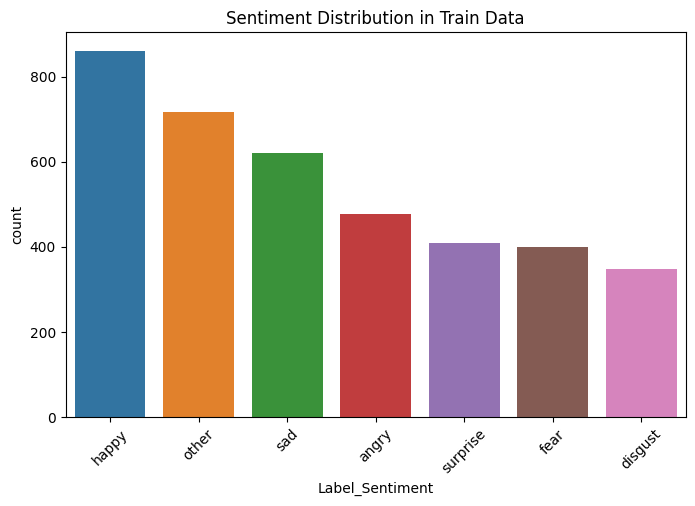

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(x=train_df['Label_Sentiment'], order=train_df['Label_Sentiment'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Sentiment Distribution in Train Data")
plt.show()




In [32]:
from sklearn.utils import resample

max_samples = train_df["Label_Sentiment"].value_counts().max()

df_list = []
for sentiment in train_df["Label_Sentiment"].unique():
    df_temp = train_df[train_df["Label_Sentiment"] == sentiment]
    df_resampled = resample(df_temp, replace=True, n_samples=max_samples, random_state=42)
    df_list.append(df_resampled)

balanced_train_df = pd.concat(df_list)


In [33]:
for sentiment in train_df['Label_Sentiment'].unique():
    sample_text = train_df[train_df['Label_Sentiment'] == sentiment]['Captions'].sample(1).values[0]
    print(f"{sentiment.upper()} → {sample_text}\n")


OTHER → এই স্ন্যাপচ্যাটগুলি আপনার প্রাক্তনকে মরিয়া করে তুলবে

SURPRISE → চলমান মেঘ, মুখে আঠা, গুয়াক, কলা, মিষ্টি আলুর ফ্রাই এবং ঝলমলে জল। এক ছবিতে আমার জীবন। ???

SAD → এটা সত্যিই হৃদয় অনুভূত ছিল। ধন্যবাদ

FEAR → আমি আমার পথ খুঁজে পাচ্ছি না. আমি যদি চিরতরে হারিয়ে যাই?

DISGUST → পিএলএস সাইন পিটিশন কুকুরের খামারে কুকুরের জন্য কোনও আনন্দ নেই

ANGRY → এই দুই বোনকে মারধর করা হয়েছিল এবং পুরুষদের দ্বারা জিম্মি রাখা হয়েছিল

HAPPY → আমাদের অভিনেতার সাথে সেট করার জন্য একটি হালকা হৃদয়যুক্ত মুহুর্ত। অনেক সুখী



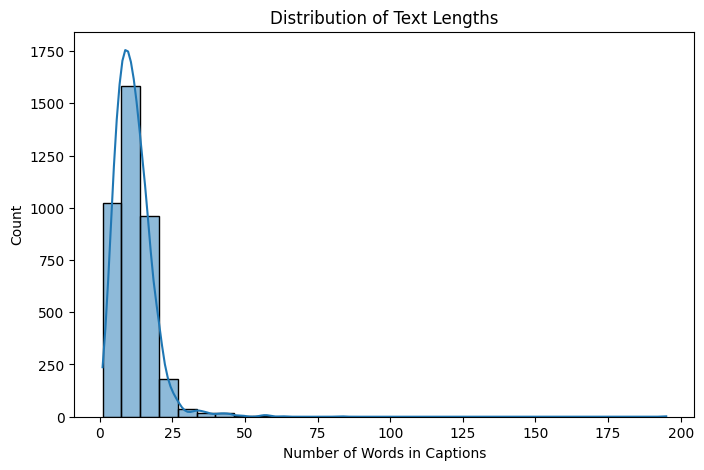

In [34]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import seaborn as sns
import matplotlib.pyplot as plt

# Ensure there are no missing values
train_df['Captions'] = train_df['Captions'].fillna("").astype(str)

# Compute text lengths
train_df['text_length'] = train_df['Captions'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8,5))
sns.histplot(train_df['text_length'], bins=30, kde=True)
plt.title("Distribution of Text Lengths")
plt.xlabel("Number of Words in Captions")
plt.show()


In [35]:
print("Total Unique Images in Train Data:", train_df['image_name'].nunique())
print("Total Images in Dataset:", train_df.shape[0])


Total Unique Images in Train Data: 3832
Total Images in Dataset: 3833


In [36]:
!apt-get update
!apt-get install fonts-noto-cjk fonts-noto-color-emoji fonts-noto-ui-core -y


Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]                
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease                                              
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]                           
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,369 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]                             
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]                                
Get:8 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [68.9 kB]                 
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]                   
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:11 https://r2u.

In [37]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Set Bengali font explicitly
bengali_font_path = "/usr/share/fonts/truetype/noto/NotoSansBengaliUI-Regular.ttf"
bengali_font = fm.FontProperties(fname=bengali_font_path)

# Apply the font globally for Bengali
plt.rcParams["font.family"] = bengali_font.get_name()
plt.rcParams["axes.unicode_minus"] = False  # Fix minus sign issues

print("✅ Using Bengali Font:", bengali_font.get_name())


✅ Using Bengali Font: Noto Sans Bengali UI


<ipython-input-38-3d7c1b628d59>:41: UserWarning: Glyph 108 (l) missing from current font.
  plt.tight_layout()
<ipython-input-38-3d7c1b628d59>:41: UserWarning: Glyph 112 (p) missing from current font.
  plt.tight_layout()
<ipython-input-38-3d7c1b628d59>:41: UserWarning: Glyph 129311 (\N{I LOVE YOU HAND SIGN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129311 (\N{I LOVE YOU HAND SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


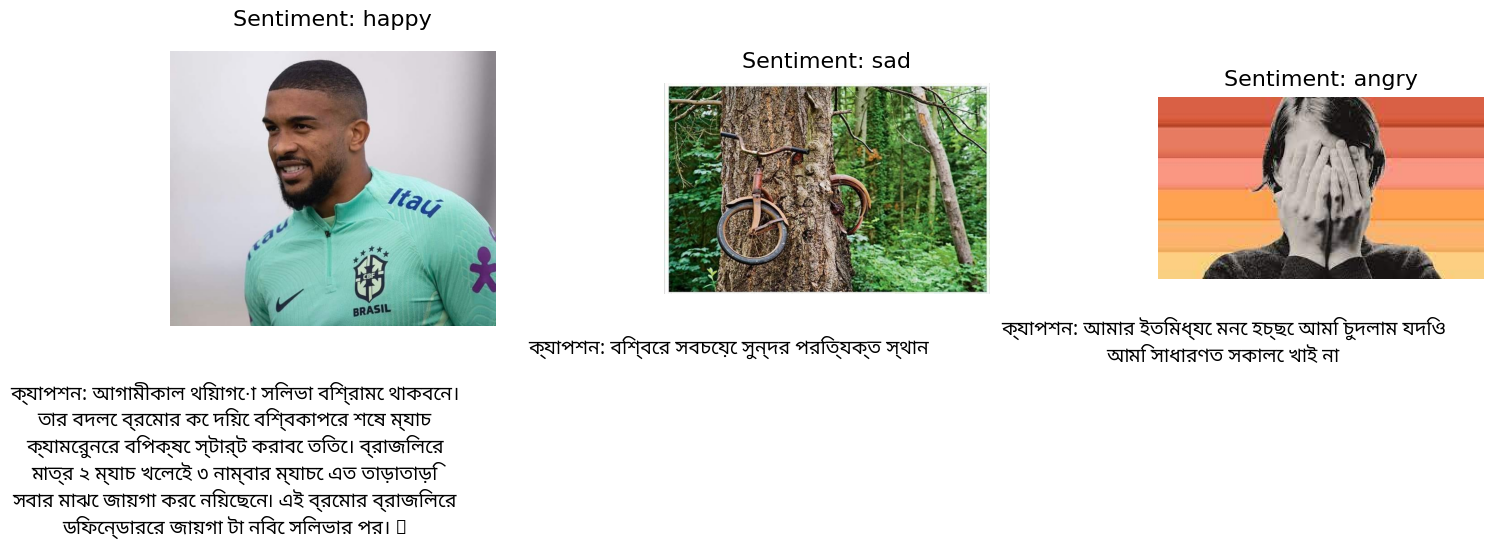

In [38]:
import random
from PIL import Image
import os
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import textwrap  # For wrapping long text

image_folder = "/kaggle/input/sentiment-analysis-in-bangla/1704054_Dataset/Images/"

# Set Bengali font
bengali_font_path = "/usr/share/fonts/truetype/noto/NotoSansBengaliUI-Regular.ttf"
bengali_font = fm.FontProperties(fname=bengali_font_path)

# Select random samples
samples = train_df.sample(3)

plt.figure(figsize=(15, 8))  # Increased figure size
for i, row in enumerate(samples.itertuples(), 1):
    img_path = os.path.join(image_folder, row.image_name)
    
    img = Image.open(img_path)

    plt.subplot(1, 3, i)
    plt.imshow(img)
    
    # Sentiment Label (English Text)
    plt.text(0.5, 1.15, f"Sentiment: {row.Label_Sentiment}", 
             fontsize=16, ha='center', va='top', transform=plt.gca().transAxes)

    # Wrap Long Bengali Captions (50 characters per line)
    wrapped_caption = "\n".join(textwrap.wrap(f"ক্যাপশন: {row.Captions}", width=50))

    # Display Caption Below Image
    plt.text(0.2, -0.2, wrapped_caption, fontproperties=bengali_font,
             fontsize=14, ha='center', va='top', transform=plt.gca().transAxes)

    plt.xticks([])
    plt.yticks([])
    plt.axis("off")

plt.tight_layout()
plt.show()


✅ Using Font: Noto Sans Bengali UI


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 77 (M) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 111 (o) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 115 (s) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 116 (t) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 67 (C) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 109 (m) missing from current font.
  fig.canvas.print_figure(bytes_io, 

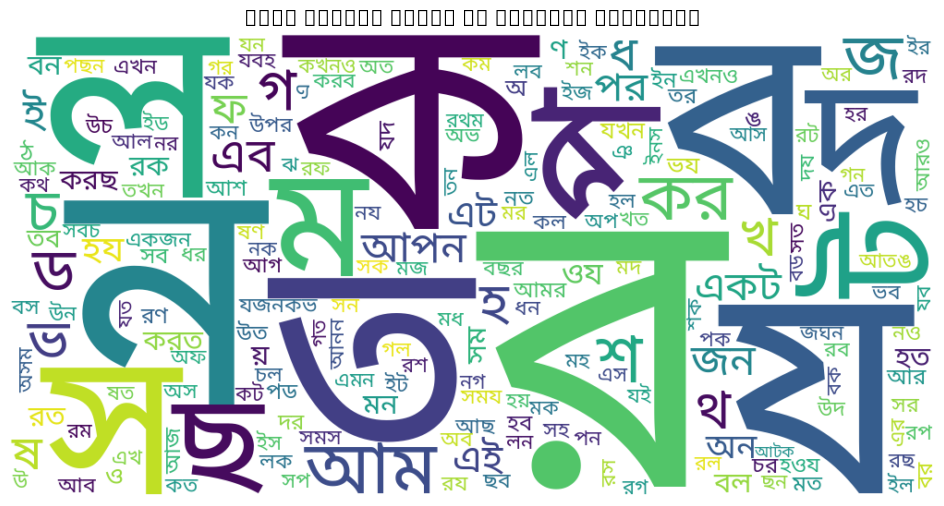

In [39]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Set a font that supports both English & Bengali
bengali_font_path = "/usr/share/fonts/truetype/noto/NotoSansBengaliUI-Regular.ttf"
universal_font_path = "/usr/share/fonts/truetype/noto/NotoSansCJK-Regular.ttc"  # Change if needed

# Check which font exists
try:
    font_path = universal_font_path  # Prefer universal font
    font_name = fm.FontProperties(fname=font_path).get_name()
except:
    font_path = bengali_font_path  # Fallback to Bengali-only font
    font_name = fm.FontProperties(fname=font_path).get_name()

print(" Using Font:", font_name)

# Merge all text captions into one string
all_text = " ".join(train_df["Captions"].dropna())  # Drop NaN values if any

# Generate WordCloud
wordcloud = WordCloud(
    font_path=font_path,  
    width=1000, height=500, 
    background_color="white",
    colormap="viridis",
    collocations=False  # Prevents duplicate words appearing larger
).generate(all_text)

# Plot WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Bengali Captions", fontproperties=fm.FontProperties(fname=font_path), fontsize=16)
plt.show()


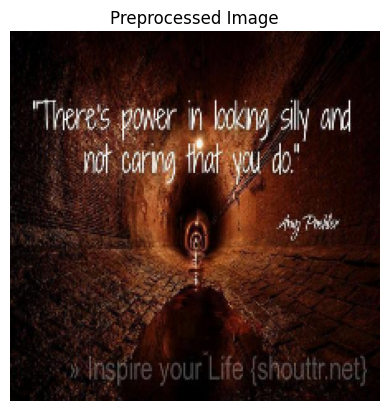

In [40]:
import cv2
import numpy as np

def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))  # Resizing to standard size
    img = img / 255.0  # Normalization
    return img

# Test on one image
sample_image = preprocess_image(image_folder + train_df["image_name"].iloc[0])

plt.imshow(sample_image)
plt.axis("off")
plt.title("Preprocessed Image")
plt.show()


In [41]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_VOCAB_SIZE = 10000  # Top 10,000 words
MAX_SEQ_LENGTH = 30  # Max words in a caption

# Tokenize text
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE, oov_token="<OOV>")
tokenizer.fit_on_texts(train_df["Captions"])

# Convert text to sequences
text_sequences = tokenizer.texts_to_sequences(train_df["Captions"])

# Pad sequences
padded_text = pad_sequences(text_sequences, maxlen=MAX_SEQ_LENGTH, padding="post", truncating="post")

print("Example Tokenized Text:", text_sequences[0])
print("Padded Text Shape:", padded_text.shape)


Example Tokenized Text: [4273, 377, 3, 11, 12, 347, 47, 7, 36, 1132, 95]
Padded Text Shape: (3833, 30)


In [54]:
pip install tensorflow transformers


Note: you may need to restart the kernel to use updated packages.


In [43]:
from transformers import ViTFeatureExtractor, ViTModel
import torch
import cv2
import numpy as np

# Load ViT feature extractor & model
feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-224-in21k")
vit_model = ViTModel.from_pretrained("google/vit-base-patch16-224-in21k")

# Image Preprocessing Function
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    img = feature_extractor(images=img, return_tensors="pt")["pixel_values"]
    return img

# Test on one image
sample_img_path = image_folder + train_df["image_name"].iloc[0]
img_tensor = preprocess_image(sample_img_path)

# Extract features
with torch.no_grad():
    img_features = vit_model(img_tensor).last_hidden_state[:, 0, :]  # CLS Token Output

print(" ViT Feature Shape:", img_features.shape)  # Should be (1, 768)


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

✅ ViT Feature Shape: torch.Size([1, 768])


In [44]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define text preprocessing parameters
MAX_VOCAB_SIZE = 10000  # Top 10,000 words
MAX_SEQ_LENGTH = 30  # Max words per caption

# Tokenize text
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE, oov_token="<OOV>")
tokenizer.fit_on_texts(train_df["Captions"])

# Convert text to sequences
text_sequences = tokenizer.texts_to_sequences(train_df["Captions"])

# Pad sequences
padded_text = pad_sequences(text_sequences, maxlen=MAX_SEQ_LENGTH, padding="post", truncating="post")

print(" Padded Text Shape:", padded_text.shape)  # (num_samples, MAX_SEQ_LENGTH)


✅ Padded Text Shape: (3833, 30)


In [56]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding, Concatenate, Flatten
import tensorflow as tf

#  Image Input (ViT)
image_input = Input(shape=(768,), name="image_input")

#  Text Input (LSTM)
text_input = Input(shape=(MAX_SEQ_LENGTH,), name="text_input")
embedding_layer = Embedding(input_dim=MAX_VOCAB_SIZE, output_dim=256, input_length=MAX_SEQ_LENGTH)(text_input)
lstm_layer = LSTM(128, return_sequences=False)(embedding_layer)

# Concatenate Features
merged = Concatenate()([image_input, lstm_layer])

# Dense Layers for Classification
dense1 = Dense(256, activation="relu")(merged)
dense2 = Dense(128, activation="relu")(dense1) 
output = Dense(len(train_df["Label_Sentiment"].unique()), activation="softmax")(dense2)

#  Create Model
model = Model(inputs=[image_input, text_input], outputs=output)

# Compile Model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Summary
model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ text_input (InputLayer)   │ (None, 30)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_2 (Embedding)   │ (None, 30, 256)        │      2,560,000 │ text_input[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ image_input (InputLayer)  │ (None, 768)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_2 (LSTM)             │ (None, 128)            │        197,120 │ embedding_2[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_2             │ (None, 896)            │              0 │ image_input[0][0],     │
│ (Concatenate)             │                        │                │ lstm_2[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 256)            │        229,632 │ concatenate_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 128)            │         32,896 │ dense_6[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)           │ (None, 7)              │            903 │ dense_7[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 3,020,551 (11.52 MB)

 Trainable params: 3,020,551 (11.52 MB)

 Non-trainable params: 0 (0.00 B)

In [59]:
import numpy as np
from tqdm import tqdm

# Extract image features for all images
image_features = []
for img_name in tqdm(train_df["image_name"]):
    img_tensor = preprocess_image(image_folder + img_name)
    with torch.no_grad():
        img_feat = vit_model(img_tensor).last_hidden_state[:, 0, :].numpy()
    image_features.append(img_feat)

image_features = np.array(image_features).squeeze()  # (num_samples, 768)
text_inputs = np.array(padded_text)  # (num_samples, MAX_SEQ_LENGTH)
labels = train_df["Label"].values  # Convert sentiment labels

print(" Image Feature Shape:", image_features.shape)
print(" Text Feature Shape:", text_inputs.shape)
print(" Labels Shape:", labels.shape)      

100%|██████████| 3833/3833 [15:48<00:00,  4.04it/s]

 Image Feature Shape: (3833, 768)
 Text Feature Shape: (3833, 30)
 Labels Shape: (3833,)


In [60]:
# Train the multimodal model
history = model.fit(
    [image_features, text_inputs], labels,
    validation_split=0.2,
    epochs=8,
    batch_size=32
)


Epoch 1/8
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.2631 - loss: 1.8202 - val_accuracy: 0.2321 - val_loss: 2.7510
Epoch 2/8
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4970 - loss: 1.3588 - val_accuracy: 0.3677 - val_loss: 2.2789
Epoch 3/8
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6671 - loss: 0.9932 - val_accuracy: 0.3129 - val_loss: 3.0868
Epoch 4/8
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8273 - loss: 0.5774 - val_accuracy: 0.1864 - val_loss: 4.0646
Epoch 5/8
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9367 - loss: 0.2622 - val_accuracy: 0.0143 - val_loss: 6.1129
Epoch 6/8
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9616 - loss: 0.1565 - val_accuracy: 0.4498 - val_loss: 3.7901
Epoch 7/8
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9880 - loss: 0.0778 - val_accuracy: 0.0717 - val_loss: 5.8766
Epoch 8/8
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9853 - loss: 0.0601 - val_accuracy: 0.4029 - val_loss: 4.6856